#**Lab 3: Analyzing Data in Python**

# RPAD 676: Data Science for the Public Good

## Author: Sachin Mitra
## Date: 2/20/25

## Instructions
In this assignment, you will conduct your own analysis using the provided dataset. Follow the prompts in each section and write the necessary Python code to complete the tasks.

**Tasks:**
- Load and explore the dataset
- Perform basic data cleaning (handling missing values, etc.)
- Generate descriptive statistics
- Create at least one meaningful visualization
- Summarize key insights from your analysis

Remember to document your thought process in markdown cells throughout the notebook.

In [3]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with actual file path)
data = pd.read_csv('digital_services_data.csv')  # Replace with actual dataset file

# Display the first few rows
data.head()

,user_id,TimeTaken,UserSatisfaction,Age,DisabilityStatus,DigitalLiteracy,Gender,EmploymentStatus,EducationLevel,InternetAccess,ErrorRates,RequestedHelp,SatisfactionOtherServices,WillingnessFutureUse,ReceivesSocialServices,Agency
0,2,919,4,38,0,5,Female,Retired,Some College,Broadband,1,0,6,10,0,Department of Health and Human Services
1,9,759,10,78,0,5,Male,Employed,High School,Broadband,1,0,3,8,0,Department of Public Safety
2,13,853,8,45,0,3,Female,Unemployed,Bachelor,Broadband,2,0,6,10,0,Department of Education
3,15,503,4,66,0,3,Male,Student,Bachelor,Broadband,1,0,2,1,0,Department of Public Safety
4,25,857,7,69,0,1,Female,Employed,Some College,Mobile Data,4,0,3,1,0,Department of Education


In [4]:
# Get dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_id                    1000 non-null   int64 
 1   TimeTaken                  1000 non-null   int64 
 2   UserSatisfaction           1000 non-null   int64 
 3   Age                        1000 non-null   int64 
 4   DisabilityStatus           1000 non-null   int64 
 5   DigitalLiteracy            1000 non-null   int64 
 6   Gender                     1000 non-null   object
 7   EmploymentStatus           1000 non-null   object
 8   EducationLevel             1000 non-null   object
 9   InternetAccess             1000 non-null   object
 10  ErrorRates                 1000 non-null   int64 
 11  RequestedHelp              1000 non-null   int64 
 12  SatisfactionOtherServices  1000 non-null   int64 
 13  WillingnessFutureUse       1000 non-null   int64 
 14  ReceivesS

## Descriptive Statistics

Compute and interpret basic statistics for the dataset:
- Mean, median, mode
- Standard deviation, min, max
- Any other relevant metrics

_Write your code below:_

In [5]:
# Find Descriptive Statistics, Rounded
descriptive_stats = data.describe().round(2)
print("Descriptive Statistics for Numeric Variables:")
print(descriptive_stats)

Descriptive Statistics for Numeric Variables:
       user_id  TimeTaken  UserSatisfaction      Age  DisabilityStatus  \
count  1000.00    1000.00           1000.00  1000.00           1000.00   
mean    500.50    1059.03              4.95    49.04              0.15   
std     288.82     344.67              2.90    17.89              0.36   
min       1.00       0.00              1.00    18.00              0.00   
25%     250.75     830.50              2.00    34.00              0.00   
50%     500.50    1064.00              5.00    50.00              0.00   
75%     750.25    1274.00              7.00    64.00              0.00   
max    1000.00    2136.00             10.00    79.00              1.00   

       DigitalLiteracy  ErrorRates  RequestedHelp  SatisfactionOtherServices  \
count          1000.00     1000.00        1000.00                    1000.00   
mean              3.05        2.39           0.29                       5.61   
std               1.40        2.38           0.

In [6]:
# Find the median of numeric columns
data.median(numeric_only=True)

user_id                       500.5
TimeTaken                    1064.0
UserSatisfaction                5.0
Age                            50.0
DisabilityStatus                0.0
DigitalLiteracy                 3.0
ErrorRates                      2.0
RequestedHelp                   0.0
SatisfactionOtherServices       6.0
WillingnessFutureUse            6.0
ReceivesSocialServices          1.0
dtype: float64

##<font color='yellow'>Insight</font>
In comparing the mean with the median, almost all numerical columns seem to have very normal distributions.

## Data Visualization

Create at least one visualization that highlights an interesting aspect of the dataset. You may use bar plots, histograms, scatter plots, or other relevant charts.

_Write your code below:_

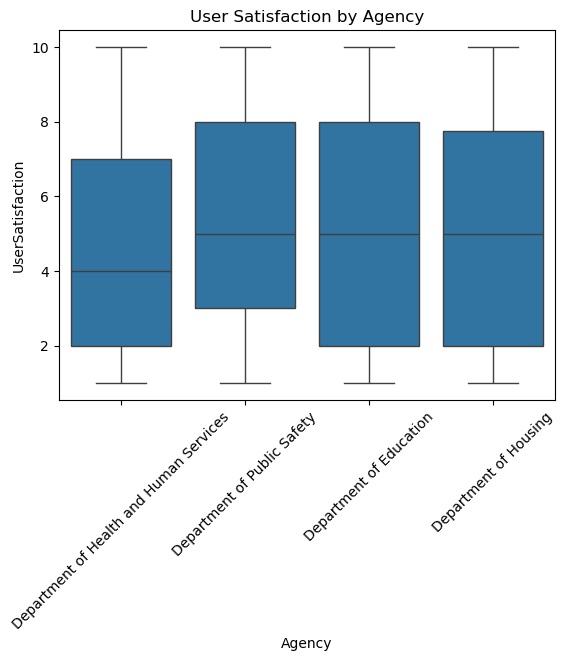

In [7]:
# Box plot

sns.boxplot(x=data['Agency'], y=data['UserSatisfaction'])
plt.title("User Satisfaction by Agency")
plt.xticks(rotation=45)
plt.show()

##<font color='yellow'>Insight</font>
All agencies have a pretty widely distributed sample of Satisfaction. DHHS seems to have a lower avg score than the other three agencies.

## Inferential Statistics

### T-Tests
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [8]:
# Calculate the mean of a continuous variable
user_satisfaction = 'UserSatisfaction'
avg_user_satisfaction = data[user_satisfaction].mean().round(2)
print(f"\nMean of {user_satisfaction}: {avg_user_satisfaction}")


Mean of UserSatisfaction: 4.95


In [9]:
# Calculate the mean of a continuous variable
future_use = 'WillingnessFutureUse'
avg_future_use = data[future_use].mean().round(2)
print(f"\nMean of {future_use}: {avg_future_use}")


Mean of WillingnessFutureUse: 5.76


In [10]:
# Select numeric columns
numeric_cols = data.select_dtypes (include=['number']).columns

# Calculate the means of continuous variables across groups
grouping_variable = 'Agency'
grouped_means = data.groupby(grouping_variable)[numeric_cols].mean().round(2)
print(f"\nMean values of continuous variables grouped by {grouping_variable}:")
print(grouped_means)


Mean values of continuous variables grouped by Agency:
                                         user_id  TimeTaken  UserSatisfaction  \
Agency                                                                          
Department of Education                   497.80     902.80              5.13   
Department of Health and Human Services   507.95    1183.80              4.70   
Department of Housing                     472.55    1033.89              4.88   
Department of Public Safety               521.81    1119.40              5.04   

                                           Age  DisabilityStatus  \
Agency                                                             
Department of Education                  48.88              0.15   
Department of Health and Human Services  50.53              0.14   
Department of Housing                    48.39              0.15   
Department of Public Safety              48.53              0.17   

                                         Digital

In [12]:
# install statsmodels
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 37.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [13]:
# import library
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
# Map binary genders for t-test (exclude 'Non-binary' for this test)
data_binary = data[data['Gender'].isin(['Female', 'Male'])].copy()
data_binary['Gender_numeric'] = data_binary['Gender'].map({'Female': 0, 'Male': 1})

### T-Test
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [22]:
# T-Test: Comparing means across two groups

group_female = data_binary[data_binary['Gender_numeric'] == 0]['UserSatisfaction'].dropna()
group_male = data_binary[data_binary['Gender_numeric'] == 1]['UserSatisfaction'].dropna()

t_stat, p_val = stats.ttest_ind(group_female, group_male)

print(f"T-test: Effect of Gender on User Satisfaction")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

T-test: Effect of Gender on User Satisfaction
t-statistic = -1.1021, p-value = 0.2707


<font color='blue'>__Insight -__</font>
While the t-test shows that males score slightly lower, there is no statistically significant difference meaning the difference is just aslikely due to random variation, than any real effect of gender.

### ANOVA
Compare means across multiple groups using the ANOVA test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [23]:
# Means across more than two groups

outcome_variable = 'UserSatisfaction'
categorical_variable = 'Agency'

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)
print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)


Mean of UserSatisfaction grouped by Agency:
Agency
Department of Education                    5.13
Department of Health and Human Services    4.70
Department of Housing                      4.88
Department of Public Safety                5.04
Name: UserSatisfaction, dtype: float64


In [26]:
# ANOVA: Comparing time taken across agency types

aov = smf.ols(f'{outcome_variable} ~ C({categorical_variable})', data=data).fit()
anova_table = sm.stats.anova_lm(aov, typ=2)

print("\nANOVA Results:")
print(anova_table)


ANOVA Results:
                sum_sq     df         F    PR(>F)
C(Agency)    25.144653    3.0  0.995716  0.394072
Residual   8383.939347  996.0       NaN       NaN


In [27]:
# Conduct post hoc test (Tukey HSD) if ANOVA is significant
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("\nANOVA is significant. Conducting post hoc Tukey HSD test:")
    tukey_results = pairwise_tukeyhsd(endog=data[outcome_variable], groups=data[categorical_variable], alpha=alpha)
    print(tukey_results)
else:
    print("\nANOVA is not significant. No post hoc test needed.")


ANOVA is not significant. No post hoc test needed.


/var/folders/_r/13_6z2c15zz2fh0w3xvyy2qr0000gn/T/ipykernel_21987/3810532535.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


## Key Insights

Summarize your findings in a short paragraph. What patterns or trends did you observe? Were there any surprises in the data? How might these insights be useful?

_Write your response below:_

The data in most numerical columns is very normally distributed. There was so statistically signifant correlations found when investigating User Satisfaction by Agency or by Gender.